In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit


# I - Distributions and probabilites

### 1.1

Expected  | mean: 5.0000
Simulated | mean: 5.0314


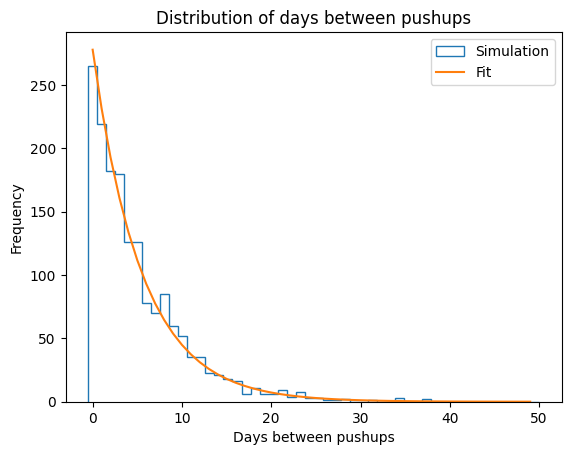

In [2]:
days = 10000

r = np.random
r.seed(42)

days_since = []
count = 0
for _ in range(days):
    num = r.randint(1, 7)

    if num == 6:
        days_since.append(count)
        count = 0
    else:
        count += 1

p = 1/6
print(f"Expected  | mean: {(1-p)/p:.4f}")
print(f"Simulated | mean: {np.mean(days_since):.4f}")

plt.hist(days_since, 50, range = (-0.5, 50), label = "Simulation", histtype="step");
k = np.arange(0, 50)
expected_freq = (1 - p)**k * p
plt.plot(k, expected_freq * days * p, label = "Fit")

plt.xlabel("Days between pushups")
plt.ylabel("Frequency")
plt.title("Distribution of days between pushups")
plt.legend()
plt.show()

The figure above shows the distribution of days between pushups. This is a geometric distribution and therefore the fit on the figure is also a geometric distribution fit. When calculating the mean of a geometric distribution you can do $\mu = \frac{1}{p}$ when counting total trials and $\mu = \frac{1-p}{p}$ when counting failures.

In this case we are counting failures and thus the second approach is used. From this we find that the mean of the simulated data fit nicely with the expected mean: $\mu_\mathrm{sim} = 5.03$, $\mu_\mathrm{theo} = 5.00$.

Therefore the distribution describing the time between pushup-days is very much exponential, but due to the discrete nature of dice, it is a geometric distribution.

In [3]:
N = 10000
days = 10

rolls = 120

data = np.zeros(N)

for i in range(N):
    total_pushups = 0
    for d in range(days):
        num = r.randint(1, 7)

        if num == 6:
            for _ in range(rolls):
                if r.randint(1, 7) == 6:
                    total_pushups += 1
            
    data[i] = total_pushups

print(f"Mean: {np.mean(data):.2f} | Uncertainty: {np.std(data):.2f} | Median: {np.median(data):.2f}")

Mean: 33.00 | Uncertainty: 24.15 | Median: 30.00


Simulating the number of pushups done in 10 days 10000 times gives the following results:

- Mean = 33 $\pm$ 24
- Median = 31

### 1.2

In [4]:
N = 1000000

data = np.zeros(N)
for i in range(N):
    num = r.random() * 90
    data[i] = num <= 3 or num >= 87

uncertainty = np.std(data) / np.sqrt(N)
print(f"p = {np.mean(data)*100:.2f} +- {uncertainty * 100:.2f}%")

p = 6.69 +- 0.02%


Given that the question implies that the pyramide is North-South aligned despite being off by 3 degrees, this indicates that a window of +- 3 degrees qualifies as aligned.

Using this we can simulate/generate random angles and check whether they can be considered aligned. Generating a random number between 0-1 and multiplying this by 90 yields a random number in the range 0-90. From here we accept the number if it is less than or equal to 3 or if it is bigger than or equal to 87 ($\pm$ 3). Doing this 1000000 times yields:

$p = 6.69 \pm 0.02$%

This is in accordance with the theoretical value of:

$p_\mathrm{theory} = \frac{6}{90} = \frac{1}{15} \approx 6.67$%

# II - Error propagation

### 2.1

In [5]:
r_e = 149e-6
r_e_err = 3e-6

r_proto = 25e-6
r_proto_err = 5e-6

r_comet = 309e-6
r_comet_err = 20e-6

f = (r_e - r_comet) / (r_proto - r_comet)

err_e = (1 / (r_proto - r_comet))**2 * r_e_err**2
err_c = ((r_e - r_proto) / (r_proto - r_comet)**2 )**2 * r_comet_err**2
err_p = ((r_comet - r_e) / (r_proto - r_comet)**2)**2 * r_proto_err**2
f_err = np.sqrt(err_c + err_e + err_p)

print(f"Fraction from proto: {f:.2f} +- {f_err:.2f}")
print(f"Fraction from comet: {(1-f):.2f} +- {f_err:.2f}")


Fraction from proto: 0.56 +- 0.03
Fraction from comet: 0.44 +- 0.03


Assuming that the hydrogen in water on earth comes only from the proto-solar system and comets, we can set up the equation:

$r_\mathrm{earth} = f_\mathrm{proto} \cdot r_\mathrm{proto} + (1 - f_\mathrm{proto}) \cdot r_\mathrm{comet}$

Solving for the fraction from proto:

$f_\mathrm{proto} = \frac{r_\mathrm{earth} - r_\mathrm{comet}}{r_\mathrm{proto} - r_\mathrm{comet}}$

From this we find:

$f_\mathrm{proto} = 0.56 \pm 0.03$

$f_\mathrm{comet} = 0.44 \pm 0.03$

### 2.2

In [6]:
t = 98.4
t_err = 3.7

N = 1971
N_err = np.sqrt(N)

def calc_r_err(t_val):
    return np.sqrt((-N/t_val**2)**2 * t_err**2 + (1/t_val)**2 * N_err**2)

ratio = N/t
r_err = calc_r_err(t)

print(f"Found r = {ratio:.1f} +- {r_err:.1f}")

alpha = 1/40
a = alpha**2
b = 1/ratio
c = t_err**2

t_new = (b + np.sqrt(b**2 + 4 * a * c))/(2*a)

print(f"For relative uncertainty 2.5%, the experiment needs to run for {t_new:.2f} s")

Found r = 20.0 +- 0.9
For relative uncertainty 2.5%, the experiment needs to run for 193.23 s


From the values and their uncertainties we can find a results and the corresponding uncertainty using error propagation:

$r = (20.0 \pm 0.9) \frac{1}{s}$

In order to find the time the experiment should run for the relative uncertainty to drop below 2.5% we can use the equation for the uncertainty:

$\sigma_\mathrm{r} = \sqrt{\left(-\frac{N}{t^2}\right)^2 \sigma_\mathrm{t}^2 + \left(\frac{1}{t}\right)^2 \sigma_\mathrm{N}^2}$

$\alpha = \frac{\sigma_\mathrm{r}}{r}$

Where alpha is the relative uncertainty. Solving this yields:

$\alpha^2 t^2 - \frac{1}{r}t - \sigma_\mathrm{t}^2 = 0$

Which again yields:

$t = 193.23 s$

Therefore we can say that the experiment should run for atleast 193.23 seconds if the relative error is to be lower than 2.5%.

### 2.3

--- RESULTS: DATA WITHOUT PROVIDED UNCERTAINTIES ---
Pylon 1:     51.1 +/- 0.6 (N_cut: 2)
Pylon 2:     91.3 +/- 0.2 (N_cut: 1)
Pylon 3:    131.5 +/- 0.2 (N_cut: 1)
Pylon 4:    172.9 +/- 0.1 (N_cut: 2)

--- RESULTS: DATA WITH PROVIDED UNCERTAINTIES ---
Pylon 1:     50.6 +/- 0.6 (N_cut: 1)
Pylon 2:     90.8 +/- 0.3 (N_cut: 1)
Pylon 3:    131.6 +/- 0.2 (N_cut: 1)
Pylon 4:    173.2 +/- 0.3 (N_cut: 1)


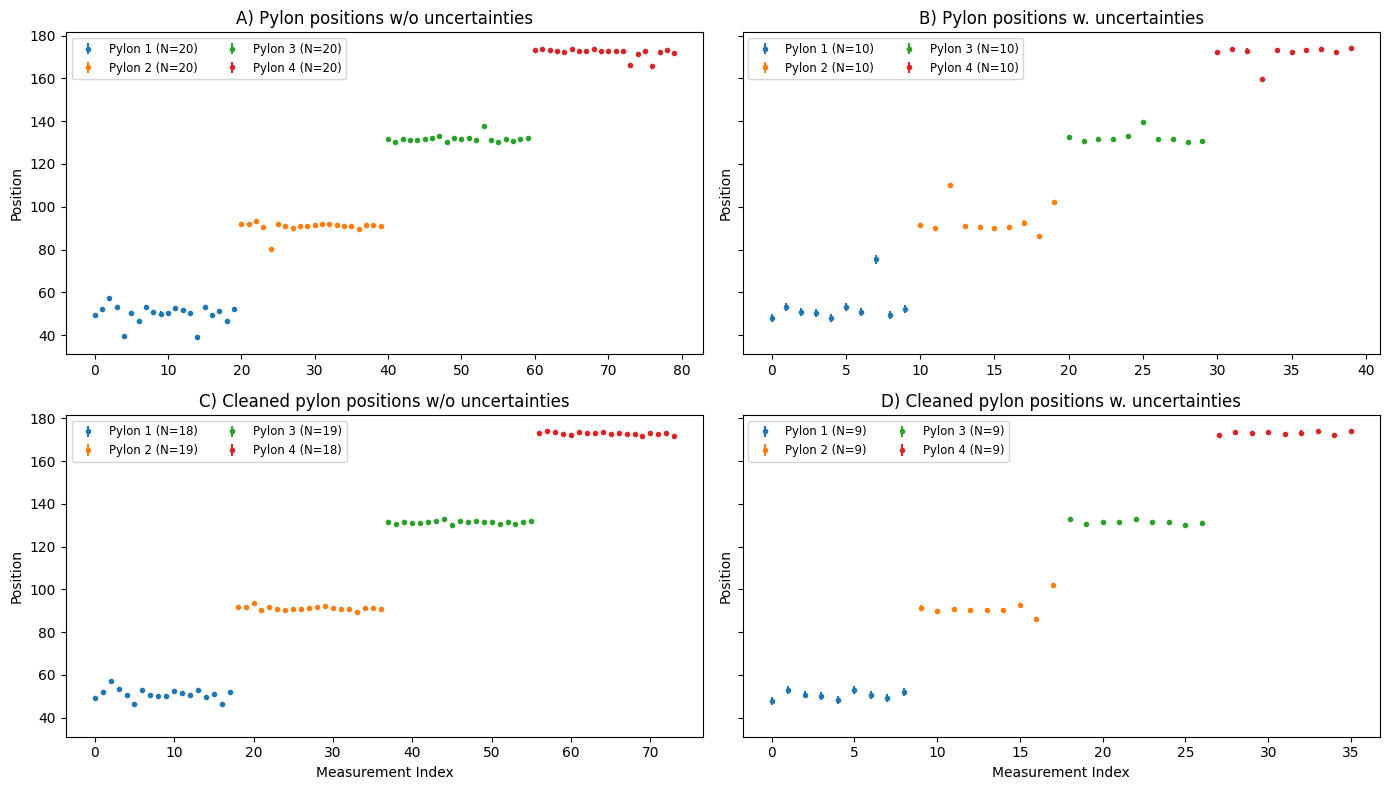

In [7]:
import pandas as pd
from scipy.stats import norm
from scipy import stats

def chauvenet_criterion(data, unc=None):
    N = len(data)
    if N < 2: return data, np.array([]), unc
    
    mu = np.mean(data)
    sigma = np.std(data, ddof=1)
    z = np.abs(data - mu) / sigma
    
    probs = 2 * norm.sf(z)
    mask = probs >= 1 / (2 * N)
    
    if unc is not None:
        return data[mask], data[~mask], unc[mask]
    else:
        return data[mask], data[~mask], None

def chauvenet_iterative(data, unc=None):
    kept_d = np.array(data)
    kept_u = np.array(unc) if unc is not None else None
    total_cut = 0
    any_removed = True
    
    while any_removed:
        clean_d, cut_d, clean_u = chauvenet_criterion(kept_d, kept_u)
        if len(cut_d) == 0:
            any_removed = False
        else:
            kept_d = clean_d
            kept_u = clean_u
            total_cut += len(cut_d)
            
    return kept_d, total_cut, kept_u

def weighted_mean(data, unc):
    weights = 1.0 / unc**2
    mu_w = np.sum(weights * data) / np.sum(weights)
    sigma_w = np.sqrt(1.0 / np.sum(weights))
    return mu_w, sigma_w

dataframe = pd.read_csv('data_PylonPositions.csv', header=0)
Ppos, Ppos_unc = dataframe.values.T

mask_no_unc = (Ppos_unc == -1.00)
Ppos_no_unc = Ppos[mask_no_unc]

Ppos_with_unc = Ppos[~mask_no_unc]
Ppos_actual_unc = Ppos_unc[~mask_no_unc]

def get_data(raw, mask_ref):
    p1 = raw[mask_ref < 80]
    p2 = raw[(mask_ref > 80) & (mask_ref < 120)]
    p3 = raw[(mask_ref > 120) & (mask_ref < 150)]
    p4 = raw[(mask_ref > 150)]
    return [p1, p2, p3, p4]  

dnu = get_data(Ppos_no_unc, Ppos_no_unc)
dwu = get_data(Ppos_with_unc, Ppos_with_unc)
dwu_uncs = get_data(Ppos_actual_unc, Ppos_with_unc)

print("--- RESULTS: DATA WITHOUT PROVIDED UNCERTAINTIES ---")
dnu_chau = []
for i, p in enumerate(dnu):
    kept, n_cut, _ = chauvenet_criterion(p)
    dnu_chau.append(kept)
    res_mu = np.mean(kept)
    res_err = np.std(kept, ddof=1) / np.sqrt(len(kept))
    print(f"Pylon {i+1}: {res_mu:8.1f} +/- {res_err:3.1f} (N_cut: {len(p) - len(kept)})")

print("\n--- RESULTS: DATA WITH PROVIDED UNCERTAINTIES ---")
dwu_chau = []
dwu_uncs_chau = []
for i, (p, u) in enumerate(zip(dwu, dwu_uncs)):
    kept_d, n_cut, kept_u = chauvenet_criterion(p, u)
    dwu_chau.append(kept_d)
    dwu_uncs_chau.append(kept_u)
    w_mu, w_err = weighted_mean(kept_d, kept_u)
    print(f"Pylon {i+1}: {w_mu:8.1f} +/- {w_err:3.1f} (N_cut: {len(p) - len(kept_d)})")

fig, ax = plt.subplots(2, 2, figsize=(14, 8), sharey=True)

def format_ax(axis, title, xlabel=None):
    axis.set_title(title)
    if xlabel: axis.set_xlabel(xlabel)
    axis.set_ylabel("Position")

def plot_pylons(ax, ps, uncs=None):
    i = 1
    start = 0
    for idx, p in enumerate(ps):
        x_vals = np.linspace(start, len(p) + start - 1, len(p))
        if uncs is not None:
            current_unc = uncs[idx]
        else:
            current_unc = np.std(p, ddof=1) / np.sqrt(len(p))
            
        ax.errorbar(
            x_vals, 
            p, 
            yerr=current_unc, 
            fmt='.', 
            label=f"Pylon {i} (N={len(p)})"
        )
        
        start += len(p)
        i += 1
        
    ax.legend(loc='upper left', fontsize='small', ncol=2)
    ax.set_ylabel("Pylon Position [m]")

plot_pylons(ax[0,0], dnu)
format_ax(ax[0,0], "A) Pylon positions w/o uncertainties")

plot_pylons(ax[0,1], dwu, dwu_uncs)
format_ax(ax[0,1], "B) Pylon positions w. uncertainties")

plot_pylons(ax[1,0], dnu_chau)
format_ax(ax[1,0], "C) Cleaned pylon positions w/o uncertainties", "Measurement Index")

plot_pylons(ax[1,1], dwu_chau, dwu_uncs_chau)
format_ax(ax[1,1], "D) Cleaned pylon positions w. uncertainties", "Measurement Index")

plt.tight_layout()
plt.show()

In [8]:

print("\n--- RESULTS: COMBINED GROUPS AND COMPATIBILITY ---")

combined_results = []
final_mu = []
final_err = []

for i in range(4):
    mu1 = np.mean(dnu_chau[i])
    sig1 = np.std(dnu_chau[i], ddof=1) / np.sqrt(len(dnu_chau[i]))
    
    mu2, sig2 = weighted_mean(dwu_chau[i], dwu_uncs_chau[i])
    
    mu_comb, sig_comb = weighted_mean(np.array([mu1, mu2]), np.array([sig1, sig2]))
    final_mu.append(mu_comb)
    final_err.append(sig_comb)

    diff = mu1 - mu2
    diff_unc = np.sqrt(sig1**2 + sig2**2)
    z_score = np.abs(diff) / diff_unc
    p_val = 2 * (1 - stats.norm.cdf(z_score))
    
    status = "Match" if z_score < 2 else "Inconsistent"
    
    print(f"Pylon {i+1}:")
    print(f"  Combined Position: {mu_comb:8.2f} +/- {sig_comb:5.2f}")
    print(f"  Difference:        {diff:8.2f} +/- {diff_unc:5.2f} (Z = {z_score:.2f}, p = {p_val:.3f})")
    print(f"  Conclusion:        {status}")
    print("-" * 60)

distances = np.diff(final_mu)
dist_uncs = np.sqrt(np.array(final_err[:-1])**2 + np.array(final_err[1:])**2)

print("\n--- RESULTS: EQUIDISTANT PYLONS ---")
for i in range(len(distances)):
    print(f"{i+1}->{i+2}: {distances[i]:.1f} +/- {dist_uncs[i]:.1f}")

weights_d = 1.0 / dist_uncs**2
common_dist = np.sum(weights_d * distances) / np.sum(weights_d)

print(common_dist)


chi2_val = np.sum(((distances - common_dist) / dist_uncs)**2)
ndof = len(distances) - 1  # 3 distances - 1 parameter (the common distance) = 2
p_val_equidistant = 1 - stats.chi2.cdf(chi2_val, ndof)

print(f"\n--- TEST: EQUIDISTANT PYLONS ---")
print(f"Distances: {distances}")
print(f"Weighted Average Distance: {common_dist:.2f} m")
print(f"Chi2: {chi2_val:.3f}, Ndof: {ndof}")
print(f"P-value for equidistance: {p_val_equidistant:.4f}")

if p_val_equidistant > 0.05:
    print("Conclusion: The pylons ARE consistent with being equidistant.")
else:
    print("Conclusion: The pylons are NOT equidistant (significant deviation).")


--- RESULTS: COMBINED GROUPS AND COMPATIBILITY ---
Pylon 1:
  Combined Position:    50.86 +/-  0.42
  Difference:            0.54 +/-  0.84 (Z = 0.64, p = 0.524)
  Conclusion:        Match
------------------------------------------------------------
Pylon 2:
  Combined Position:    91.15 +/-  0.16
  Difference:            0.48 +/-  0.33 (Z = 1.45, p = 0.148)
  Conclusion:        Match
------------------------------------------------------------
Pylon 3:
  Combined Position:   131.50 +/-  0.13
  Difference:           -0.11 +/-  0.30 (Z = 0.37, p = 0.709)
  Conclusion:        Match
------------------------------------------------------------
Pylon 4:
  Combined Position:   173.01 +/-  0.13
  Difference:           -0.25 +/-  0.30 (Z = 0.81, p = 0.416)
  Conclusion:        Match
------------------------------------------------------------

--- RESULTS: EQUIDISTANT PYLONS ---
1->2: 40.3 +/- 0.4
2->3: 40.4 +/- 0.2
3->4: 41.5 +/- 0.2
40.93147852092932

--- TEST: EQUIDISTANT PYLONS ---
Distan

From the z and p values we can see that all 4 pylons have z values below 2 and p values above 0.05. Thus we can conclude that for all 4 pylons the data from the two measurement group match eachother.

Based on the p-value for equidistance, we can conclude that the pylons are not equidistantly positioned. This is due to p = 0.0001 < 0.01 which is the minimal required value.

# III - Simulation / Monte Carlo

### 3.1

In [9]:
def find_overlap(p_a, p_b, N = 10000):
    r_a = p_a[0]
    center_a = p_a[1:]

    r_b = p_b[0]
    center_b = p_b[1:]

    theta = r.uniform(0, 2 * np.pi, N)
    r_p = r_a * np.sqrt(r.uniform(0, 1, N))

    x = center_a[0] + r_p * np.cos(theta)
    y = center_a[1] + r_p * np.sin(theta)

    dist_to_b = np.sqrt((x - center_b[0])**2 + (y - center_b[1])**2)

    overlap = dist_to_b <= r_b

    fraction = np.sum(overlap) / N
    return fraction

N = 1000

f_abs = []
f_bas = []
for _ in range(N):
    f_ab = find_overlap([6, 0, 0], [4, 3, 7])
    f_abs.append(f_ab)
    
    f_ba = find_overlap([4, 3, 7], [6, 0, 0])
    f_bas.append(f_ba)
    

print(f"f_ab: {np.mean(f_abs):.3f} +/- {np.std(f_abs):.3f}")
print(f"f_ba: {np.mean(f_bas):.3f} +/- {np.std(f_bas):.3f}")

print(f"{np.mean(f_bas)/np.mean(f_abs):.3f} {(6/4)**2:.3f}")


f_ab: 0.091 +/- 0.003
f_ba: 0.205 +/- 0.004
2.254 2.250


In [10]:

def find_overlap_4d(p_a, p_b, N=10000):
    """
    p_a, p_b = [radius, x, y, z, w]
    Estimates the fraction of hyperball A overlapped by hyperball B
    """

    r_a = p_a[0]
    c_a = np.array(p_a[1:])

    r_b = p_b[0]
    c_b = np.array(p_b[1:])

    x = r.normal(size=(N, 4))
    x /= np.linalg.norm(x, axis=1)[:, None]

    radii = r_a * r.uniform(0, 1, N) ** 0.25

    points = c_a + x * radii[:, None]

    dist2_to_b = np.sum((points - c_b)**2, axis=1)
    overlap = dist2_to_b <= r_b**2

    fraction = np.mean(overlap)
    return fraction

N = 1000

f_abs = []
f_bas = []
for _ in range(N):
    f_ab = find_overlap_4d([6, 0, 0, 0, 0], [4, 3, 7, -1, 2])
    f_abs.append(f_ab)
    
    f_ba = find_overlap_4d([4, 3, 7, -1, 2], [6, 0, 0, 0, 0])
    f_bas.append(f_ba)
    

print(f"f_ab: {np.mean(f_abs):.3f} +/- {np.std(f_abs):.3f}")
print(f"f_ba: {np.mean(f_bas):.3f} +/- {np.std(f_bas):.3f}")

print(f"{np.mean(f_bas)/np.mean(f_abs):.3f} {(6/4)**4:.3f}")

f_ab: 0.015 +/- 0.001
f_ba: 0.074 +/- 0.003
5.074 5.062


fabtrue​fbatrue​​=VB​VA​​=(rb​ra​​)d​

$\frac{f_{ab}^{true}}{f_{ba}^{true}}=\frac{V_B}{V_A}=\left(\frac{r_b}{r_a}\right)^d$

## 3.2

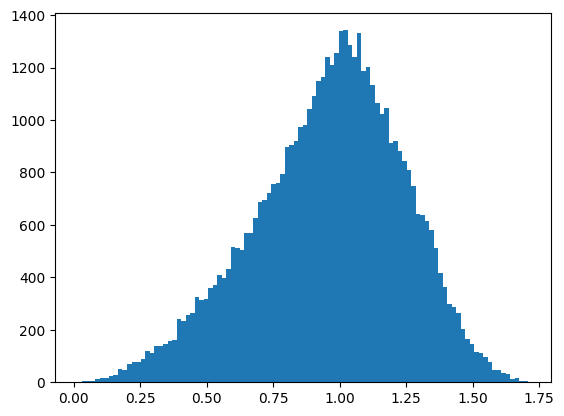

In [11]:
N = 50000

x = r.uniform(-1, 1, N)
y = r.uniform(-1, 1, N)
z = r.uniform(-1, 1, N)

radius = np.sqrt(x**2 + y**2 + z**2)

plt.hist(radius, bins = 100);


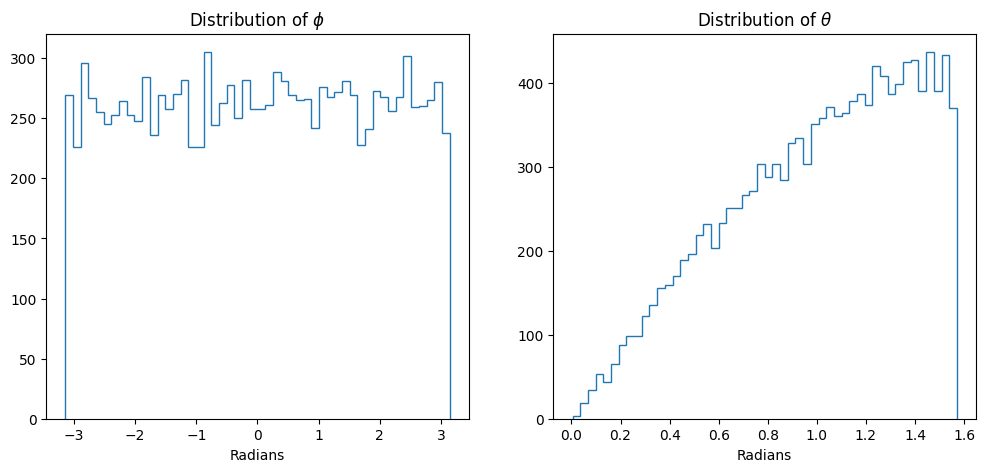

In [12]:
mask = (radius < 1) & (z > 0)
x_half = x[mask]
y_half = y[mask]
z_half = z[mask]
r_half = radius[mask]

phi = np.arctan2(y_half, x_half)

theta = np.arccos(z_half / r_half)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(phi, bins=50, histtype = "step")
ax[0].set_title(r"Distribution of $\phi$")
ax[0].set_xlabel("Radians")

ax[1].hist(theta, bins=50, histtype = "step")
ax[1].set_title(r"Distribution of $\theta$")
ax[1].set_xlabel("Radians")

plt.show()

In [13]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

counts, bins = np.histogram(theta, bins=50)
bin_centers = (bins[:-1] + bins[1:]) / 2

errors = np.sqrt(counts)
errors[errors == 0] = 1 

def model_theta(x, amplitude):
    return amplitude * np.sin(x)

initial_amplitude = len(theta) / (50 / (np.pi/2)) 
least_squares = LeastSquares(bin_centers, counts, errors, model_theta)
m = Minuit(least_squares, amplitude=initial_amplitude)
m.migrad()
m.hesse()

chi2 = m.fval
ndof = len(bin_centers) - m.nfit
p_val = 1 - stats.chi2.cdf(chi2, ndof)


In [14]:
counts_phi, bins_phi = np.histogram(phi, bins=50)
bin_centers_phi = (bins_phi[:-1] + bins_phi[1:]) / 2

errors_phi = np.sqrt(counts_phi)
errors_phi[errors_phi == 0] = 1 

def model_phi(x, constant):
    return np.full_like(x, constant)

initial_constant = len(phi) / 50

least_squares_phi = LeastSquares(bin_centers_phi, counts_phi, errors_phi, model_phi)
m_phi = Minuit(least_squares_phi, constant=initial_constant)
m_phi.migrad()
m_phi.hesse()

chi2_phi = m_phi.fval
ndof_phi = len(bin_centers_phi) - m_phi.nfit
p_val_phi = 1 - stats.chi2.cdf(chi2_phi, ndof_phi)


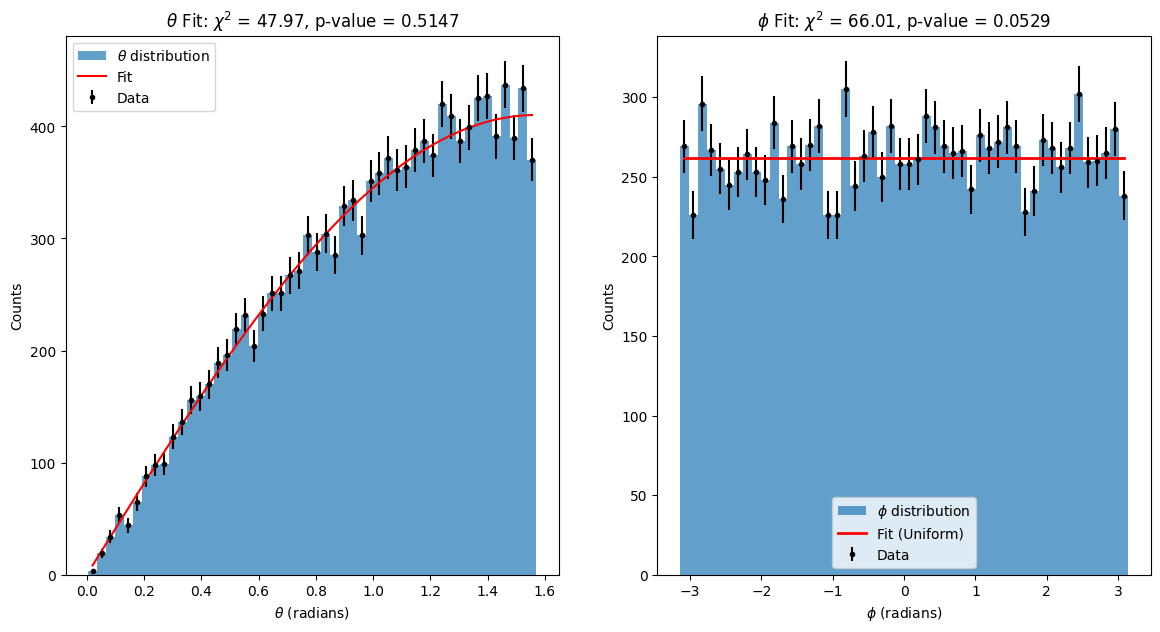

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (14, 7))

ax[0].hist(theta, bins = 50, label = r"$\theta$ distribution", alpha = 0.7)
ax[0].errorbar(bin_centers, counts, yerr=errors, fmt="ko", label="Data", markersize=3)
ax[0].plot(bin_centers, model_theta(bin_centers, *m.values), label="Fit", color='red')
ax[0].set_title(fr"$\theta$ Fit: $\chi^2$ = {chi2:.2f}, p-value = {p_val:.4f}")
ax[0].set_xlabel(r"$\theta$ (radians)")
ax[0].set_ylabel("Counts")
ax[0].legend()

ax[1].hist(phi, bins=50, label=r"$\phi$ distribution", alpha=0.7)
ax[1].errorbar(bin_centers_phi, counts_phi, yerr=errors_phi, fmt="ko", label="Data", markersize=3)
ax[1].plot(bin_centers_phi, model_phi(bin_centers_phi, *m_phi.values), label="Fit (Uniform)", color='red', linewidth=2)

ax[1].set_title(fr"$\phi$ Fit: $\chi^2$ = {chi2_phi:.2f}, p-value = {p_val_phi:.4f}")
ax[1].set_xlabel(r"$\phi$ (radians)")
ax[1].set_ylabel("Counts")
ax[1].legend(loc = "lower center")
plt.show()

The function f(v) is easily integratable but not easily invertible. Therefore the accept/reject method is the preferred choice in this scenario. The x interval of the function is infinite but approaches zero rapidly as $v \approx 20v_0$. Therefore we can use this as the maximum x-value. 

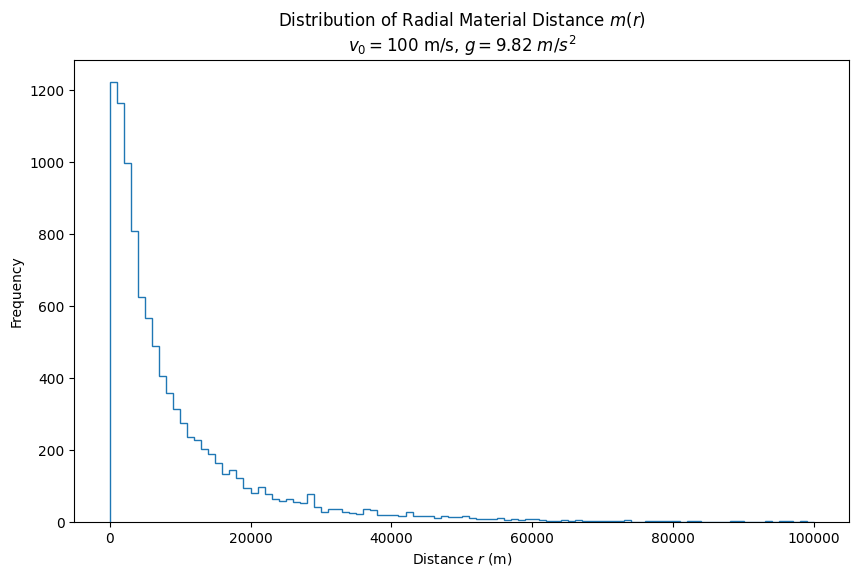

In [16]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
v0 = 100
g = 9.82

# --- 1. Generate Theta (Sine distribution) ---
# We can use the inverse transform for sin(theta): theta = arccos(1 - u)
u = np.random.uniform(0, 1, N)
theta = np.arccos(1 - u) # This gives the sin(theta) distribution on [0, pi/2]

# --- 2. Generate Velocity (Accept-Reject) ---
def get_velocities(n_samples, v0_val):
    v_list = []
    v_limit = 20 * v0_val
    # Peak of (v/v0)^2 * exp(-v/v0) is at v=2v0
    f_max = (2)**2 * np.exp(-2) 
    
    while len(v_list) < n_samples:
        v_prop = np.random.uniform(0, v_limit)
        y_prop = np.random.uniform(0, f_max)
        
        f_v = (v_prop / v0_val)**2 * np.exp(-v_prop / v0_val)
        if y_prop < f_v:
            v_list.append(v_prop)
    return np.array(v_list)

v = get_velocities(N, v0)

# --- 3. Calculate r ---
r_values = (v**2 * np.sin(theta)) / g

# --- 4. Plotting ---
plt.figure(figsize=(10, 6))
plt.hist(r_values, bins=100, histtype = "step", range = (0, 100000))
plt.title(f"Distribution of Radial Material Distance $m(r)$\n$v_0 = {v0}$ m/s, $g = {g}$ $m/s^2$")
plt.xlabel("Distance $r$ (m)")
plt.ylabel("Frequency")
plt.show()

# IV - Statistical test

### 4.1

On average, it takes 16.5 +/- 0.7 rolls to detect the fake die.


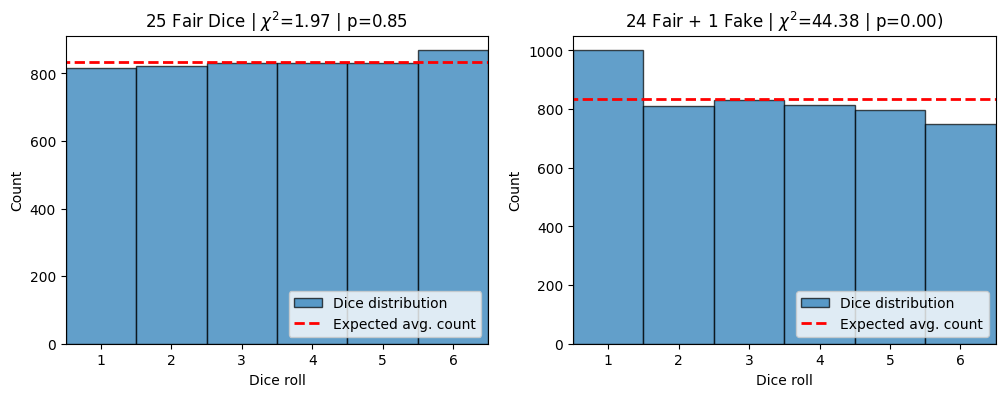

In [17]:
def roll_box(num_rolls, fake_value=None):
    if fake_value is None:
        return r.randint(1, 7, size=(num_rolls, 25)).flatten()
    else:
        fair_rolls = r.randint(1, 7, size=(num_rolls, 24))
        fake_rolls = np.full((num_rolls, 1), fake_value)
        return np.concatenate([fair_rolls, fake_rolls], axis=1).flatten()

def get_p_value(data):
    obs_counts, _ = np.histogram(data, bins=np.arange(1, 8))
    expected = np.full(6, len(data) / 6)
    chi2, p_val = stats.chisquare(obs_counts, f_exp=expected)
    return chi2, p_val

N_simulations = 100
max_rolls = 200
rolls_needed = []

for sim in range(N_simulations):
    for n in range(1, max_rolls):
        data = roll_box(n, fake_value=1)
        _, p = get_p_value(data)
        if p < 0.01:
            rolls_needed.append(n)
            break

avg_rolls = np.mean(rolls_needed)
print(f"On average, it takes {avg_rolls:.1f} +/- {np.std(rolls_needed)/np.sqrt(len(rolls_needed)):.1f} rolls to detect the fake die.")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
d_fair = roll_box(200, None)
d_fake = roll_box(200, 1)


fair_chi, fair_p = get_p_value(d_fair)
ax1.hist(d_fair, bins=np.arange(1, 8), align='left', edgecolor = "black", label = "Dice distribution", alpha = 0.7)
ax1.hlines(25*200/6, 0, 7, lw = 2, linestyles="--", color = "red", label = "Expected avg. count")
ax1.set_xlim(0.5, 6.5)
ax1.legend(loc = "lower right")
ax1.set_title(rf"25 Fair Dice | $\chi^2$={fair_chi:.2f} | p={fair_p:.2f}")
ax1.set_xlabel("Dice roll")
ax1.set_ylabel("Count")


fake_chi, fake_p = get_p_value(d_fake)
ax2.hist(d_fake, bins=np.arange(1, 8), align='left', edgecolor = "black", label = "Dice distribution", alpha = 0.7)
ax2.hlines(25*200/6, 0, 7, lw = 2, linestyles="--", color = "red", label = "Expected avg. count")
ax2.set_xlim(0.5, 6.5)
ax2.legend(loc = "lower right")
ax2.set_title(rf"24 Fair + 1 Fake | $\chi^2$={fake_chi:.2f} | p={fake_p:.2f})")
ax2.set_xlabel("Dice roll")
ax2.set_ylabel("Count")
plt.show()

# V - Fitting data

### 5.1

In [18]:
dataframe = pd.read_csv('data_InconstantBackground.csv', header=0)
distance = dataframe['# Distance']

Uniformity P-value: 0.6874


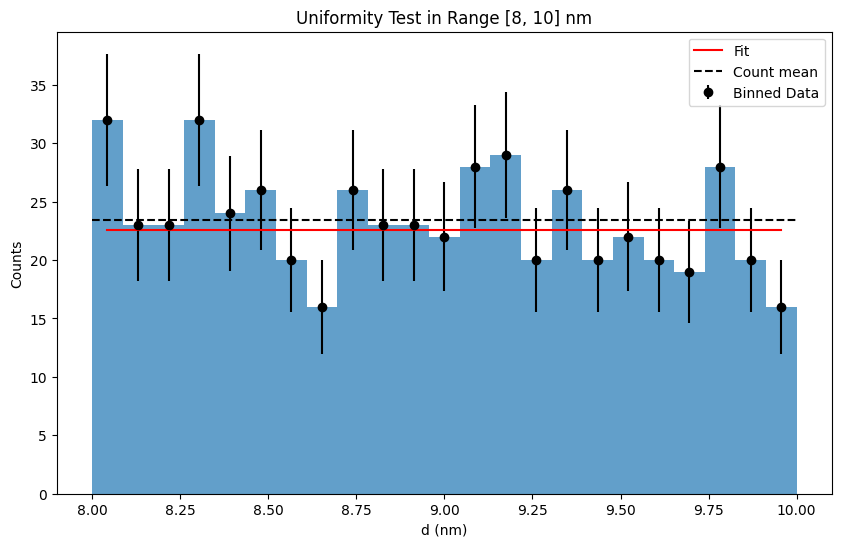

0.0 22.595177446831766


In [19]:
mask = (distance >= 8) & (distance <= 10)
bg_data = distance[mask]
N_bins = int(np.sqrt(len(distance[mask])))


counts, bin_edges = np.histogram(bg_data, bins=N_bins, range=(8, 10))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

y_err = np.sqrt(counts)
y_err[y_err == 0] = 1

def linear_model(x, slope, intercept):
    return slope * x + intercept

least_squares = LeastSquares(bin_centers, counts, y_err, linear_model)
m_uniform = Minuit(least_squares, slope=0.0, intercept=np.mean(counts))
m_uniform.fixed["slope"] = True 
m_uniform.migrad()

p_val = 1 - stats.chi2.cdf(m_uniform.fval, m_uniform.ndof)
print(f"Uniformity P-value: {p_val:.4f}")

plt.figure(figsize=(10, 6))
plt.hist(distance, bins = N_bins, range = (8, 10), alpha = 0.7);
plt.errorbar(bin_centers, counts, yerr=y_err, fmt="ok", label="Binned Data")
plt.plot(bin_centers, linear_model(bin_centers, *m_uniform.values), "r-", 
         label=f"Fit")
plt.hlines(np.mean(counts), 8, 10, color = "black", linestyles = "--", label = "Count mean")

plt.title("Uniformity Test in Range [8, 10] nm")
plt.xlabel("d (nm)")
plt.ylabel("Counts")
plt.legend()
plt.show()
print(*m_uniform.values)

In [20]:
def fit_data(data, range, fit_func, initial_guess):

    N_bins = int(np.sqrt(len(data)))
    counts, bin_edges = np.histogram(data, bins=N_bins, range=range)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    y_err = np.sqrt(counts)
    y_err[y_err == 0] = 1


    least_squares = LeastSquares(bin_centers, counts, y_err, fit_func)
    m = Minuit(least_squares, 
                **initial_guess
        )
    
    for k, v in initial_guess.items():
        if "sig" in k:
            m.limits[k] = (0.001, 1.0)
    # m.limits["mu"] = (5.0, 7.1)

    m.migrad()
    m.hesse()


    p_val = 1 - stats.chi2.cdf(m.fval, m.ndof)
    print(f"P-value: {p_val:.4f} | Chi2: {m.fval:.4f}")

    plt.figure(figsize=(10, 6))
    plt.hist(data, bins = N_bins, alpha = 0.7);


    plt.errorbar(bin_centers, counts, yerr=y_err, fmt=".k", label="Data")
    plt.plot(bin_centers, fit_func(bin_centers, *m.values), "r-", lw=2, label="Fit")

    plt.xlabel("d (nm)")
    plt.ylabel("Counts")
    plt.legend()
    plt.show()

    print(m.params)

    bin_width = bin_edges[1] - bin_edges[0]

    a_fit = m.values['a']
    sig_fit = m.values['sig']

    n_points = (a_fit * sig_fit * np.sqrt(2 * np.pi)) / bin_width

    a_err = m.errors['a']
    sig_err = m.errors['sig']
    rho = m.covariance['a', 'sig']

    n_err = n_points * np.sqrt((a_err/a_fit)**2 + (sig_err/sig_fit)**2 + 2*rho/(a_fit*sig_fit))

    print(f"Number of points: {n_points:.1f} +/- {n_err:.1f}")

P-value: 0.1377 | Chi2: 55.4006


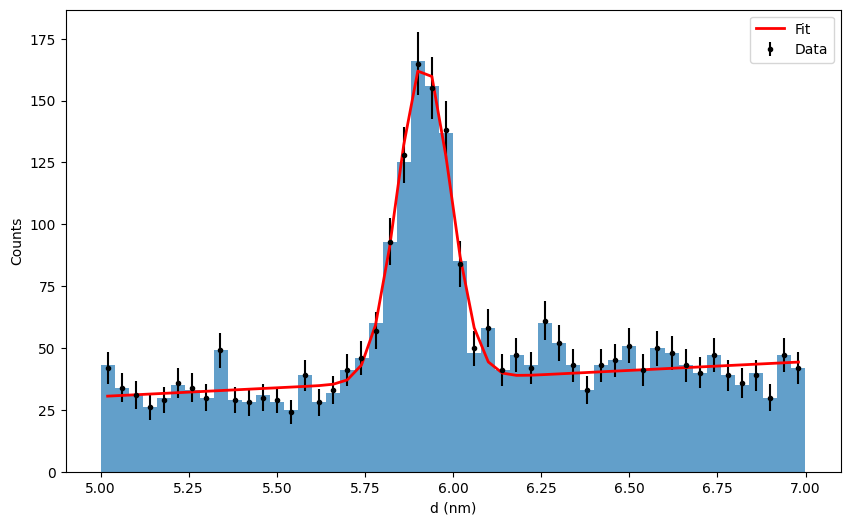

┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a     │    129    │     8     │            │            │         │         │       │
│ 1 │ mu    │   5.917   │   0.004   │            │            │         │         │       │
│ 2 │ sig   │   0.074   │   0.004   │            │            │  0.001  │    1    │       │
│ 3 │ slope │    7.0    │    1.5    │            │            │         │         │       │
│ 4 │ b     │    -5     │     9     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
Number of points: 598.8 +/- 33.0


In [21]:
def peak59_func(x, a, mu, sig, slope, b):
    g = a * np.exp(-0.5 * ((x - mu) / sig)**2)
    return g + b + slope * x
peak59_guess = {"a": 100, "mu": 5.9, "sig": 0.05, "slope": 2, "b": 10}
fit_data(distance[(distance >= 5.0) & (distance <= 7.0)], (5.0, 7.0), peak59_func, peak59_guess)

P-value: 0.4123 | Chi2: 44.4038


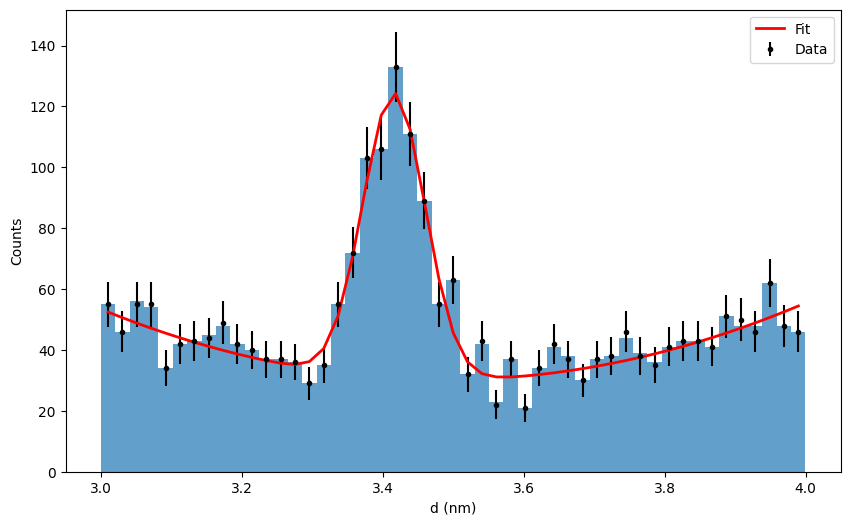

┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    94     │     6     │            │            │         │         │       │
│ 1 │ mu   │   3.416   │   0.003   │            │            │         │         │       │
│ 2 │ sig  │  0.0442   │  0.0029   │            │            │  0.001  │    1    │       │
│ 3 │ c    │   30.2    │    1.7    │            │            │         │         │       │
│ 4 │ b    │    2.0    │    3.4    │            │            │         │         │       │
│ 5 │ d    │    97     │    15     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
Number of points: 508.5 +/- 35.6


In [22]:
def peak34_func(x, a, mu, sig, c, b, d):
    gaussian = a * np.exp(-0.5 * ((x - mu) / sig)**2)
    background = c + b * (x - 3.5) + d * (x - 3.5)**2
    return gaussian + background

peak34_guess = {
    "a": 85, 
    "mu": 3.41, 
    "sig": 0.05, 
    "c": 40, 
    "b": 10,
    "d": 20
}
fit_data(distance[(distance >= 3.0) & (distance <= 4.0)], (3.0, 4.0), peak34_func, peak34_guess)

P-value: 0.1445 | Chi2: 43.8708


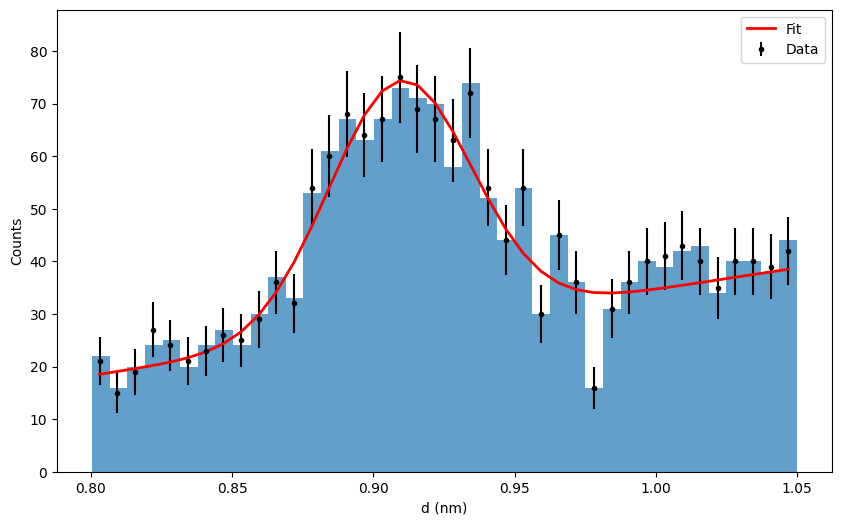

┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a     │    47     │     4     │            │            │         │         │       │
│ 1 │ mu    │  0.9095   │  0.0021   │            │            │         │         │       │
│ 2 │ sig   │  0.0253   │  0.0019   │            │            │  0.001  │    1    │       │
│ 3 │ slope │    82     │    12     │            │            │         │         │       │
│ 4 │ b     │    -47    │    11     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
Number of points: 478.3 +/- 41.5


In [23]:
def peak09_func(x, a, mu, sig, slope, b):
    g3 = a * np.exp(-0.5 * ((x - mu) / sig)**2)
    return g3 + b + slope * x

peak09_guess = {
    "a": 100,
    "mu": 0.91,
    "sig": 0.025,
    "b": 20,
    "slope": 2
}
local_range = (0.8, 1.05)
fit_data(distance[(distance >= local_range[0]) & (distance <= local_range[1])], local_range, peak09_func, peak09_guess)

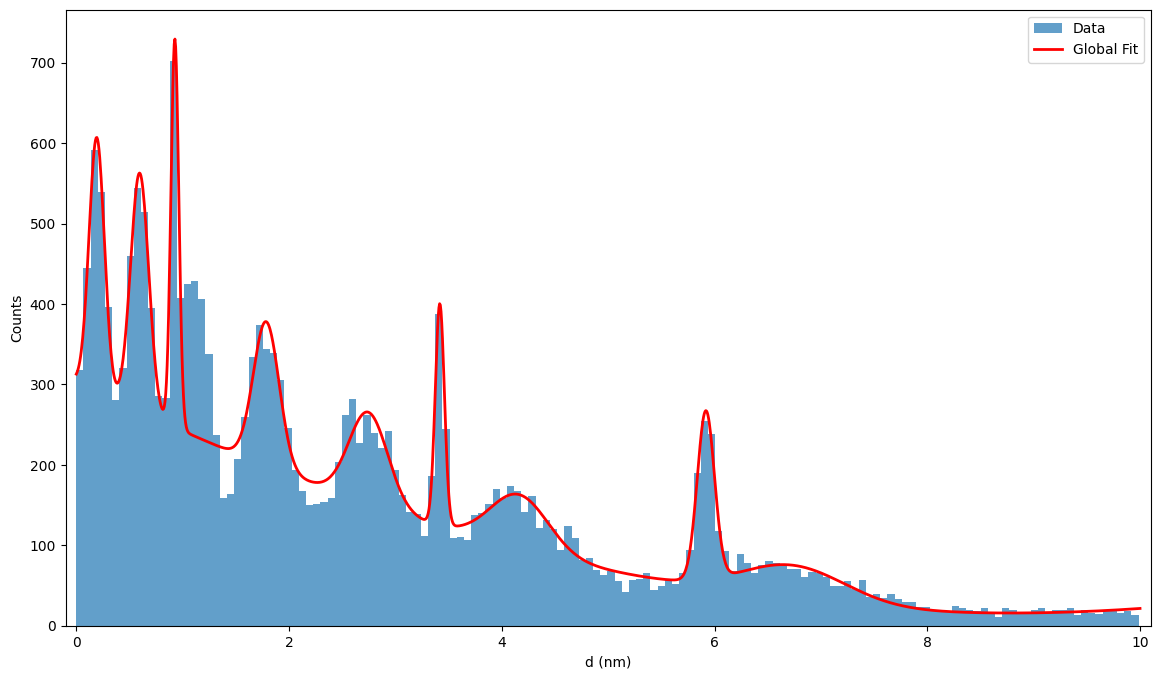

Final Chi2/ndof: 4.258
┌─────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │  q_c  q_b  q_d   a1   m1   s1   a2   m2   s2   a3   m3   s3   a4   m4   s4   a5   m5   s5   a6   m6   s6   a7   m7   s7   a8   m8   s8   a9   m9   s9 │
├─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ q_c │    1 -0.2 -0.4    0    0    0    0    0 -0.1    0    0 -0.1 -0.1    0 -0.1 -0.2 -0.1 -0.2 -0.1    0 -0.1 -0.2 -0.1 -0.4    0    0 -0.2 -0.5 -0.1    0 │
│ q_b │ -0.2    1 -0.8  0.2    0  0.3  0.2    0  0.3    0 -0.1  0.3  0.3    0  0.3  0.3    0  0.3  0.1    0  0.1  0.2    0  0.2    0    0    0 -0.1 -0.2    0 │
│ q_d │ -0.4 -0.8    1 -0.2    0 -0.3 -0.2    0 -0.3    0  0.1 -0.2 -0.2    0 -0.2 -0.1    0 -0.1    0    0    0    0  0.1  0.1    0    0  0.1  0.4  0.1    0 │
│  a1 │    0  0.2

In [24]:
def gaussian(x, a, mu, sig):
    return a * np.exp(-0.5 * ((x - mu) / sig)**2)

def total_model(x, q_c, q_b, q_d, 
                a1, m1, s1, a2, m2, s2, a3, m3, s3, 
                a4, m4, s4, a5, m5, s5, a6, m6, s6, 
                a7, m7, s7, a8, m8, s8, a9, m9, s9):
    
    bg = q_c + q_b * (x - 5.0) + q_d * (x - 5.0)**2
    
    p = [a1, m1, s1, a2, m2, s2, a3, m3, s3, a4, m4, s4, a5, m5, s5, 
         a6, m6, s6, a7, m7, s7, a8, m8, s8, a9, m9, s9]
    
    gaussians = sum(gaussian(x, p[i], p[i+1], p[i+2]) for i in range(0, len(p), 3))
    
    return bg + gaussians

N_bins = int(np.sqrt(len(distance))) 
counts, bin_edges = np.histogram(distance, bins=N_bins, range=(0, 10))

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

y_err = np.sqrt(counts)
y_err[y_err == 0] = 1

initial_bg = [40, -20, 5]
initial_peaks = [
    300, 0.22, 0.02,
    400, 0.51, 0.02,
    550, 0.91, 0.03,
    350, 1.80, 0.08,
    250, 2.70, 0.10,
    380, 3.42, 0.05,
    140, 4.10, 0.20,
    250, 5.95, 0.06,
    70,  6.80, 0.30
]
initial_values = initial_bg + initial_peaks

least_squares = LeastSquares(bin_centers, counts, y_err, total_model)
m = Minuit(least_squares, *initial_values)

for i in range(1, 10):
    m.limits[f"s{i}"] = (0.005, 0.5)

m.migrad()
m.hesse()

x_smooth = np.linspace(0, 10, 1500)
plt.figure(figsize=(14, 8))
plt.hist(distance, bins=N_bins, alpha=0.7, label="Data")


y_total = total_model(x_smooth, *m.values)

plt.plot(x_smooth, y_total, "r-", lw=2, label="Global Fit")

plt.xlabel("d (nm)")
plt.ylabel("Counts")
plt.legend()
plt.xlim(-0.1, 10.1)
plt.show()

print(f"Final Chi2/ndof: {m.fval/m.ndof:.3f}")

corr_matrix = m.covariance.correlation()
print(corr_matrix)
print(corr_matrix.shape)
print(len(corr_matrix[np.abs(corr_matrix) > 0.5]))

### 5.2

In [25]:
# ============================================================
# Per-pyramid consistency test of East (E) vs West (W) alignment
# using iminuit and chi-square p-values
# ============================================================

import numpy as np
from iminuit import Minuit

# ------------------------------------------------------------
# 1. Input data (only pyramids with both E and W measurements)
# ------------------------------------------------------------

names = np.array([
    "Meidum",
    "Bent",
    "Khufu",
    "Khafre",
    "Menkaure"
])

E = np.array([-20.6, -17.3, -3.4,  6.0, 12.4])
E_err = np.array([1.0,   0.2,  0.2,  0.2, 1.0])

W = np.array([-18.1, -11.8, -2.8,  6.0, 14.1])
W_err = np.array([1.0,   0.2,  0.2,  0.2, 1.8])

# ------------------------------------------------------------
# 2. Containers for results
# ------------------------------------------------------------

results = []

# ------------------------------------------------------------
# 3. Loop over pyramids and perform per-pyramid fits
#
#    Model:
#       E = μ
#       W = μ
#
#    with independent uncertainties.
#    ndof = 2 - 1 = 1
# ------------------------------------------------------------

def chi2(mu, E, E_err, W, W_err):
    return ((E - mu) / E_err)**2 + ((W - mu) / W_err)**2

for name, Ei, Ei_err, Wi, Wi_err in zip(names, E, E_err, W, W_err):

    m = Minuit(chi2, mu=(Ei + Wi) / 2,
               E=Ei, E_err=Ei_err,
               W=Wi, W_err=Wi_err)
    m.errordef = Minuit.LEAST_SQUARES
    m.fixed["E"] = True
    m.fixed["E_err"] = True
    m.fixed["W"] = True
    m.fixed["W_err"] = True

    m.migrad()
    m.hesse()

    mu_fit = m.values["mu"]
    mu_err = m.errors["mu"]

    chi2_min = m.fval
    ndof = 1
    p_value = 1 - stats.chi2.cdf(chi2_min, ndof)

    results.append((name, mu_fit, mu_err, chi2_min, p_value))

# ------------------------------------------------------------
# 4. Output results
# ------------------------------------------------------------

print("Per-Pyramid East–West Consistency Test")
print("=====================================")
print()
print(f"{'Pyramid':10s} {'μ_fit':>8s} {'σ_μ':>8s} {'χ²':>8s} {'p-value':>10s}")
print("-" * 50)

for r in results:
    print(f"{r[0]:10s} {r[1]:8.1f} {r[2]:8.1f} {r[3]:8.1f} {r[4]:10.2f}")


Per-Pyramid East–West Consistency Test

Pyramid       μ_fit      σ_μ       χ²    p-value
--------------------------------------------------
Meidum        -19.4      0.7      3.1       0.08
Bent          -14.6      0.1    378.1       0.00
Khufu          -3.1      0.1      4.5       0.03
Khafre          6.0      0.1      0.0       1.00
Menkaure       12.8      0.9      0.7       0.41


In [26]:
import numpy as np
from iminuit import Minuit
from scipy import stats
from scipy.optimize import brentq

# 1. Input data
names = np.array(["Meidum", "Bent", "Khufu", "Khafre", "Menkaure"])
E = np.array([-20.6, -17.3, -3.4,  6.0, 12.4])
E_err = np.array([1.0,   0.2,  0.2,  0.2, 1.0])
W = np.array([-18.1, -11.8, -2.8,  6.0, 14.1])
W_err = np.array([1.0,   0.2,  0.2,  0.2, 1.8])

def get_chi2_min(sys_err, Ei, Ei_err, Wi, Wi_err):
    """Calculates the minimum chi2 for a given systematic uncertainty."""
    total_E_err = np.sqrt(Ei_err**2 + sys_err**2)
    total_W_err = np.sqrt(Wi_err**2 + sys_err**2)
    
    def chi2_func(mu):
        return ((Ei - mu) / total_E_err)**2 + ((Wi - mu) / total_W_err)**2
    
    # Analytical minimum for mu in a 2-point weighted average
    wE = 1.0 / total_E_err**2
    wW = 1.0 / total_W_err**2
    mu_best = (Ei * wE + Wi * wW) / (wE + wW)
    
    return chi2_func(mu_best), mu_best, 1.0/np.sqrt(wE + wW)

def p_value_objective(sys_err, Ei, Ei_err, Wi, Wi_err, target_p=0.05):
    """Objective function to find where p-value equals target_p."""
    chi2_min, _, _ = get_chi2_min(sys_err, Ei, Ei_err, Wi, Wi_err)
    p_val = 1 - stats.chi2.cdf(chi2_min, df=1)
    return p_val - target_p

results = []

for name, Ei, Ei_err, Wi, Wi_err in zip(names, E, E_err, W, W_err):
    # Check if we even need systematic error
    chi2_initial, mu_init, mu_err_init = get_chi2_min(0, Ei, Ei_err, Wi, Wi_err)
    p_initial = 1 - stats.chi2.cdf(chi2_initial, df=1)
    
    if p_initial >= 0.05:
        sys_fit = 0.0
        mu_fit, mu_err, chi2_val, p_val = mu_init, mu_err_init, chi2_initial, p_initial
    else:
        # Solve for the smallest sys_err that gives p=0.05
        # We search between 0 and 10 (plenty for this dataset)
        sys_fit = brentq(p_value_objective, 0, 10, args=(Ei, Ei_err, Wi, Wi_err))
        chi2_val, mu_fit, mu_err = get_chi2_min(sys_fit, Ei, Ei_err, Wi, Wi_err)
        p_val = 1 - stats.chi2.cdf(chi2_val, df=1)

    results.append((name, mu_fit, mu_err, sys_fit, chi2_val, p_val))

# 4. Output results
print("Per-Pyramid Combined E-W Alignment (with Sys Errors)")
print("=====================================================")
print(f"{'Pyramid':10s} {'μ_fit':>8s} {'σ_stat':>8s} {'σ_sys':>8s} {'χ²':>8s} {'p-value':>10s}")
print("-" * 60)

for r in results:
    print(f"{r[0]:10s} {r[1]:8.1f} {r[2]:8.1f} {r[3]:8.2f} {r[4]:8.1f} {r[5]:10.2f}")

Per-Pyramid Combined E-W Alignment (with Sys Errors)
Pyramid       μ_fit   σ_stat    σ_sys       χ²    p-value
------------------------------------------------------------
Meidum        -19.4      0.7     0.00      3.1       0.08
Bent          -14.5      1.4     1.97      3.8       0.05
Khufu          -3.1      0.2     0.08      3.8       0.05
Khafre          6.0      0.1     0.00      0.0       1.00
Menkaure       12.8      0.9     0.00      0.7       0.41


<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_59526/555522379.py:37: SyntaxWarning: invalid escape sequence '\m'
  ecolor='gray', capsize=4, label='Combined Alignment ($\mu \pm \sigma_{tot}$)')


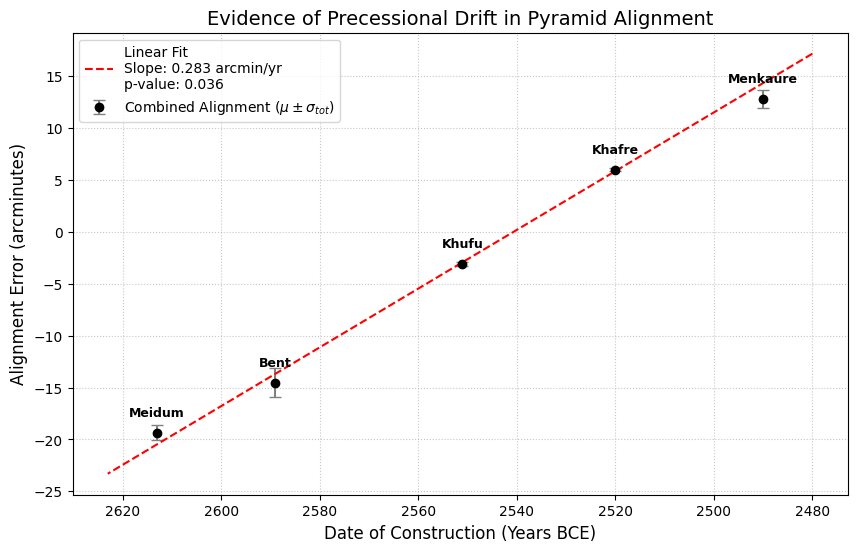

Fit Results:
Slope (m): 0.2830 +/- 0.0051 arcmin/yr
Chi2/ndof: 8.54/3
Fit p-value: 0.0360


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

# 1. Data from the previous steps
names = ["Meidum", "Bent", "Khufu", "Khafre", "Menkaure"]
dates_bce = np.array([2613, 2589, 2551, 2520, 2490])

# Combined mu and total error (stat + sys) derived from consistency test
mu_vals = np.array([-19.35, -14.55, -3.10, 6.00, 12.80])
mu_errs = np.array([0.71, 1.40, 0.15, 0.14, 0.87])

# We define time relative to 0 BCE (negative values) so time flows forward
time = -dates_bce 

# 2. Linear Model
def linear_model(t, m, c):
    return m * t + c

# 3. Perform Weighted Least Squares fit
popt, pcov = curve_fit(linear_model, time, mu_vals, sigma=mu_errs, absolute_sigma=True)
m_fit, c_fit = popt
m_err = np.sqrt(pcov[0,0])

# Calculate Chi-Square and p-value
residuals = mu_vals - linear_model(time, m_fit, c_fit)
chi2_val = np.sum((residuals / mu_errs)**2)
ndof = len(mu_vals) - 2
p_value = 1 - stats.chi2.cdf(chi2_val, ndof)

# 4. Plotting
plt.figure(figsize=(10, 6))

# Plot data points with error bars
plt.errorbar(dates_bce, mu_vals, yerr=mu_errs, fmt='o', color='black', 
             ecolor='gray', capsize=4, label='Combined Alignment ($\mu \pm \sigma_{tot}$)')

# Generate points for the fit line
x_fit_bce = np.linspace(dates_bce.min() - 10, dates_bce.max() + 10, 100)
y_fit = linear_model(-x_fit_bce, m_fit, c_fit)
plt.plot(x_fit_bce, y_fit, color='red', linestyle='--', 
         label=f'Linear Fit\nSlope: {m_fit:.3f} arcmin/yr\np-value: {p_value:.3f}')

# Annotate each point with the pyramid name
for i, name in enumerate(names):
    plt.annotate(name, (dates_bce[i], mu_vals[i]), textcoords="offset points", 
                 xytext=(0, 12), ha='center', fontsize=9, fontweight='bold')

# Format the plot
plt.gca().invert_xaxis()  # Invert so time moves left-to-right (2600 BCE to 2400 BCE)
plt.xlabel('Date of Construction (Years BCE)', fontsize=12)
plt.ylabel('Alignment Error (arcminutes)', fontsize=12)
plt.title('Evidence of Precessional Drift in Pyramid Alignment', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()

plt.show()

print(f"Fit Results:")
print(f"Slope (m): {m_fit:.4f} +/- {m_err:.4f} arcmin/yr")
print(f"Chi2/ndof: {chi2_val:.2f}/{ndof}")
print(f"Fit p-value: {p_value:.4f}")

In [28]:
import numpy as np

# 1. Constants from the previous fit and the prompt
m = 0.2828          # Drift rate (arcmin/year)
m_err = 0.0051      # Uncertainty in drift rate
theta_khufu = -3.10 # Khufu's alignment error (arcminutes)
theta_err = 0.15    # Uncertainty in alignment error
year_zero = 2467    # The year stars pointed exactly True North (BCE)

# 2. Calculation of the Alignment Year
# Formula: Year = Year_zero - (Theta / m)
# Note: Since theta is negative, we expect a year earlier than 2467 BCE
drift_years = theta_khufu / m
khufu_year = year_zero - drift_years

# 3. Error Propagation
# sigma_T = sqrt( (sigma_theta / m)^2 + (theta * sigma_m / m^2)^2 )
term_theta = theta_err / m
term_m = (theta_khufu * m_err) / (m**2)
khufu_year_err = np.sqrt(term_theta**2 + term_m**2)

# 4. Output Results
print(f"Khufu Alignment Year Analysis")
print(f"==============================")
print(f"Drift Rate:         {m:.4f} ± {m_err:.4f} arcmin/yr")
print(f"Khufu Alignment:    {theta_khufu:.2f} ± {theta_err:.2f} arcmin")
print(f"Zero-Point Year:    {year_zero} BCE")
print("-" * 30)
print(f"Estimated Year:     {khufu_year:.1f} BCE")
print(f"Uncertainty:        ± {khufu_year_err:.2f} years")

Khufu Alignment Year Analysis
Drift Rate:         0.2828 ± 0.0051 arcmin/yr
Khufu Alignment:    -3.10 ± 0.15 arcmin
Zero-Point Year:    2467 BCE
------------------------------
Estimated Year:     2478.0 BCE
Uncertainty:        ± 0.57 years


In [29]:
import numpy as np

# Inputs
target_error = -3.1
target_error_err = 0.15
m = 0.2828
m_err = 0.0051
anchor_year = 2467

# 1. Solve for T: T = (theta / m) + anchor_year
# Note: Since -3.1 / 0.28 is approx -11, it takes us back to ~2478 BCE
drift_in_years = target_error / m
estimated_year = anchor_year - drift_in_years 

# 2. Uncertainty propagation (Addition in quadrature)
# Error from the alignment measurement itself
err_from_theta = target_error_err / m
# Error from our uncertainty in the drift rate (slope)
err_from_m = (target_error * m_err) / (m**2)

total_year_err = np.sqrt(err_from_theta**2 + err_from_m**2)

print(f"Estimated Alignment Year: {estimated_year:.2f} BCE")
print(f"Uncertainty: ± {total_year_err:.2f} years")

Estimated Alignment Year: 2477.96 BCE
Uncertainty: ± 0.57 years
